 # Pymaceuticals Inc. Analysis Summary


* Total number of timepoints was lower for Capomulin and Ramicane
* Sex ratio of male and female mouses looks the same
* There are some outliers for Infubinol treatment
* There is 87.7% positve correlation between mouse weight and tumour volume
* The regression analysis also shows there is a linear relationship between weight and tumor volume
 

In [1]:
#%matplotlib notebook
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [3]:
# Checking the number of mice.
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
# Display the data table for preview
merge_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
merge_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
#Display the number of unique mice IDs in the data
merge_data["Mouse ID"].nunique()


249

In [7]:
#check for any mouse ID with duplicate time points
duplicate_data_s = merge_data.duplicated(subset=["Mouse ID","Timepoint"], keep=False) 
duplicated_mouse_IDs = merge_data[duplicate_data_s]["Mouse ID"].unique()
duplicated_mouse_IDs

array(['g989'], dtype=object)

In [8]:
#Display the duplicated rows 
merge_data[duplicate_data_s]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_data_s = merge_data["Mouse ID"].isin(duplicated_mouse_IDs)
merge_data[all_duplicate_mouse_data_s]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
#create a new DataFrame where this data is removed
clean_data_df = merge_data[~all_duplicate_mouse_data_s]
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_data_df["Mouse ID"].count()

1880

In [12]:
clean_data_df["Mouse ID"].nunique()

248

## Summary Statistics

In [13]:
#sort clean data by Tumor volume
clean_data_df_sort = clean_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True)

clean_data_df_sort.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


In [14]:
#Identify the diferrent Drug Regimen along with the total tumer volume for each using .groupby
regimen_grouped = clean_data_df_sort.groupby(["Drug Regimen"])
regimen_grouped




In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()
regimen_median = regimen_grouped["Tumor Volume (mm3)"].mean()
regimen_variance = regimen_grouped["Tumor Volume (mm3)"].var()
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()


In [17]:
summary_stats = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,54.033581,61.168083,7.821003,0.581331
Propriva,52.320930,52.320930,43.852013,6.622085,0.544332
Ramicane,40.216745,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,54.233149,59.450562,7.710419,0.573111


## Bar and Pie Charts

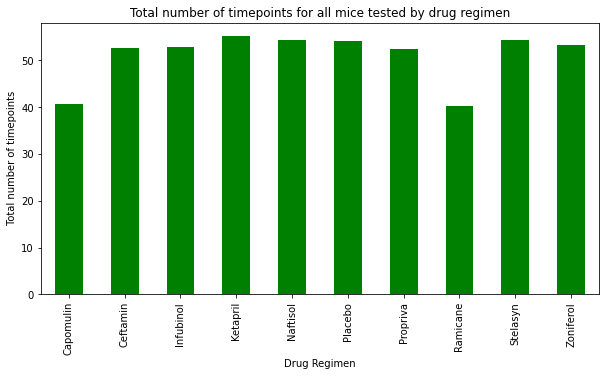

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_mean.plot(kind="bar", color="green", figsize=(10,5))

#set chart title
plt.title("Total number of timepoints for all mice tested by drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel(" Total number of timepoints")

#show chart and set layout
plt.show()
plt.tight_layout()

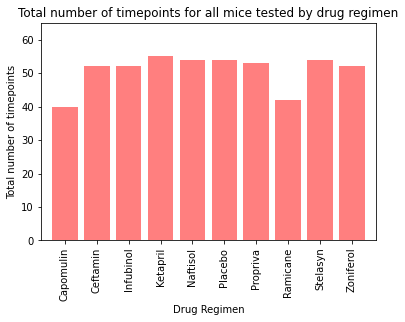

<Figure size 432x288 with 0 Axes>

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
users = [40, 52, 52, 55, 54, 54, 53, 42, 54,52]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(users))

plt.bar(x_axis, users, color='r', alpha=0.5, align='center')

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

# Sets the x limits of the current char
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(users)+10)

# Give the chart some labels and a tile
plt.title("Total number of timepoints for all mice tested by drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of timepoints")

#show chart and set layout
plt.show()
plt.tight_layout()



In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
groupby_gender = clean_data_df.groupby(["Mouse ID","Sex"])
groupby_gender
mouse_gender_df = pd.DataFrame(groupby_gender.size())
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]
#create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#gender_df
mouse_gender


,Total Count,Percentage of Sex
Sex,,
Female,123,49.596774
Male,125,50.403226


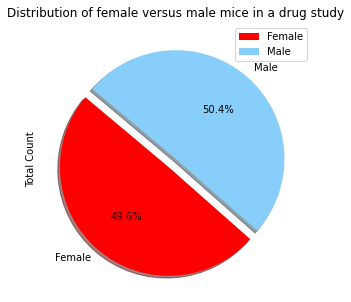

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

colors = ["red", "lightskyblue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")
plt.title('Distribution of female versus male mice in a drug study')
plt.show()


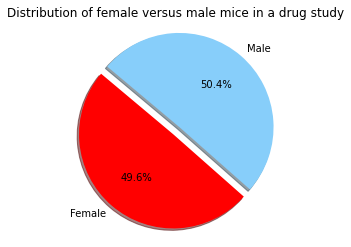

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Female","Male"]
colors = ["red", "lightskyblue"]
sizes = [49.596774,50.403226]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=sex, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title('Distribution of female versus male mice in a drug study')
plt.show()


## Quartiles, Outliers and Boxplots

In [23]:
# newCalculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
last_time_point_df = clean_data_df.groupby('Mouse ID')['Timepoint'].max()
last_time_point_df = last_time_point_df.reset_index()

last_time_point_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = last_time_point_df.merge(clean_data_df, on=['Mouse ID', 'Timepoint' ],how="left" )
merged_df 


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [24]:
# Create a list that holds the treatment names as well as a second, empty list to hold the tumor volume data
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = []
# Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment

for treatment in treatments:
    treatment_df = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volumes.append(treatment_df)
    # If the data is in a dataframe, we use pandas to give quartile calculations
    quartiles = treatment_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile ofTumor Volume (mm3) is: {lowerq}")
    print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
    print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
    print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")   

The lower quartile ofTumor Volume (mm3) is: 32.37735684
The upper quartile of Tumor Volume (mm3) is: 40.1592203
The interquartile range of Tumor Volume (mm3) is: 7.781863460000004
The the median of Tumor Volume (mm3) is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile ofTumor Volume (mm3) is: 31.56046955
The upper quartile of Tumor Volume (mm3) is: 40.65900627
The interquartile range of Tumor Volume (mm3) is: 9.098536719999998
The the median of Tumor Volume (mm3) is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile ofTumor Volume (mm3) is: 54.04860769
The upper quartile of Tumor Volume (mm3) is: 65.52574285
The interquartile range of Tumor Volume (mm3) is: 11.477135160000003
The the median of Tumor Volume (mm3) is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

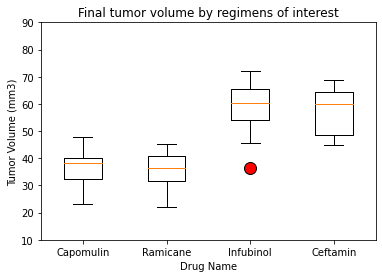

In [25]:
# The second example again looks at the LAX temperature data set and computes quantiles
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
out = dict(markerfacecolor= 'red', markersize=12)
plt.boxplot(tumor_volumes, labels=treatments,flierprops=out)
plt.title("Final tumor volume by regimens of interest")
plt.xlabel("Drug Name")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(10, 90)
plt.show()


## Line and Scatter Plots

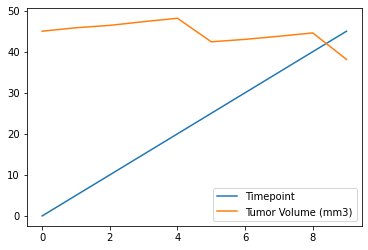

In [26]:
time_vs_tumer = merge_data[merge_data["Mouse ID"].isin(["j119"])]
time_vs_tumer

time_vs_tumer_data = time_vs_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumer_data

line_plot_df = time_vs_tumer_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()
plt.legend(loc="lower right")


## Correlation and Regression

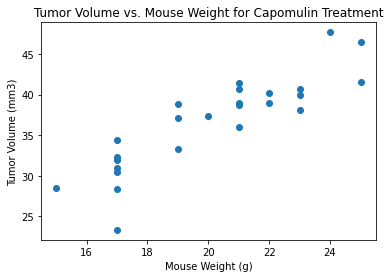

In [27]:
#Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.time_vs_tumer = merge_data[merge_data["Mouse ID"].isin(["j119"])]
capomulin_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Create the scatter plot
plt.scatter(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'])

# Add axis labels and a title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Mouse Weight for Capomulin Treatment')

# Show the plot
plt.show()

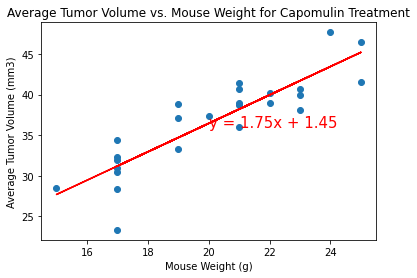

The correlation coefficient is 0.8767060403658116


In [28]:
#to calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment
# 1st Filter the DataFrame to only include the Capomulin treatment regimen
capomulin_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Then group by Mouse ID to get the mean of the Tumor Volume for each Mouse
grouped_df = capomulin_df.groupby(['Mouse ID']).mean()

# Get the x and y values for the linear regression
x_values = grouped_df['Weight (g)']
y_values = grouped_df['Tumor Volume (mm3)']

# Do the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create the scatter plot
plt.scatter(x_values, y_values)

# Plot the linear regression line
plt.plot(x_values,regress_values,"r-")

# Add the equation of the line to the plot
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

# Give our chart some labels and a tile
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Treatment')

# Show the plot
plt.show()

# Print the correlation coefficient
print(f'The correlation coefficient is {rvalue}')